In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

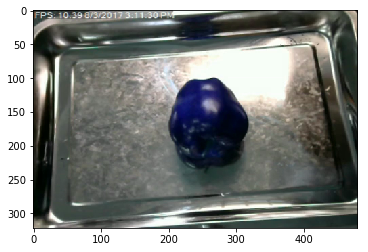

In [3]:
DATADIR = "C:/Users/nicol/Code/DeepFruit/Fruit_Database"

CATEGORIES = ["Apple", "Banana", "Carambola", "Guava", "Kiwi", "Mango", "Muskmelon", "Orange", 
              "Peach", "Pear", "Persimmon", "Pitaya", "Plum", "Pomegranate", "Tomatoes"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_COLOR)
        plt.imshow(image_array)
        plt.show()
        break
    break

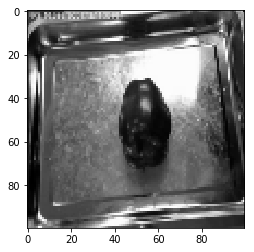

In [6]:
IMG_SIZE = 100
new_array = cv2.resize(image_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category) 
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()

print(len(training_data))

100%|██████████████████████████████████████████████████████████████████████████████| 2171/2171 [00:30<00:00, 70.05it/s]


42108


In [8]:
import random

random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
9
13
14
4
0
3
2
0
7


In [9]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

In [14]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [15]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()